# Sử dụng Pandas và Seaborn thực hiện phân tích EDA cho dữ liệu bán hàng (supermarket_sales_vn.csv)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
np.set_printoptions(precision=4, suppress=True)

In [2]:
%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize':(7,5)})

In [4]:
sns.set_palette('Set1')
sns.color_palette()

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [5]:
data = pd.read_csv('supermarket_sales_vn.csv')
data.isnull().sum()

Invoice ID       0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
cogs             0
Rating           0
dtype: int64

In [6]:
data.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating
0,750-67-8428,Hà Nội,Member,Nữ,Health and beauty,74.69,7,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,9.1
1,226-31-3081,TP HCM,Normal,Nữ,Electronic accessories,15.28,5,3.8200,80.2200,3/8/19,10:29,Cash,76.40,9.6
2,631-41-3108,Hà Nội,Normal,Nam,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,7.4
3,123-19-1176,Hà Nội,Member,Nam,Health and beauty,58.22,8,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,8.4
4,373-73-7910,Hà Nội,Normal,Nam,Sports and travel,86.31,7,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,5.3


In [7]:
# data.dropna(inplace=True, axis=0, how='any')
# data.reset_index(inplace=True, drop=True)


# $\color{red}{\text{Đơn biến (phân tích trên 1 cột):}}$

#  Số đơn: so sánh tổng đơn theo chi nhánh, nhóm hàng, giới tính khách hàng, phương thức thanh toán

### So sánh tổng đơn theo chi nhánh 

[Text(0, 0, '85584.4'), Text(0, 0, '161645'), Text(0, 0, '75737.6')]

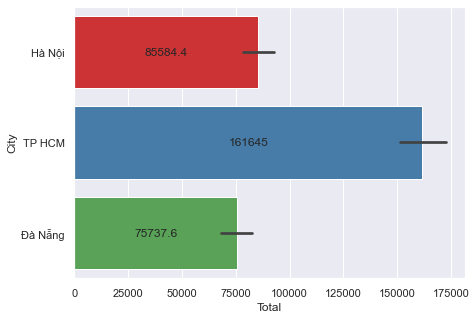

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
sns.barplot(data=data, x='Total', y='City', ax=ax, estimator=np.sum)
ax.bar_label(container = ax.containers[0], label_type='center')

<p>- Thành phố Hồ Chí Minh có tổng doanh thu cao nhất (gần gấp đôi các thành phố còn lại) (estimator = np.sum).
<p>- Ba thành phố thu được trung bình lợi nhuận xất xỉ nhau (estimator = np.mean)

### So sánh tổng đơn theo nhóm hàng 

Text(0, 0.5, 'Product line')

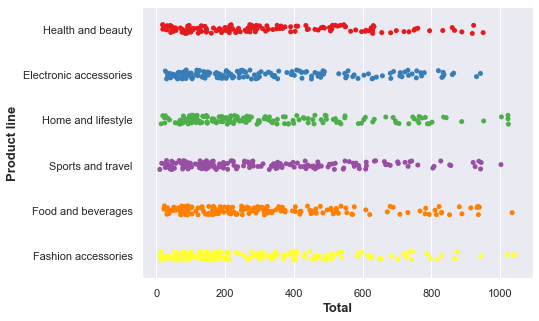

In [9]:
ax = sns.stripplot(data=data, x='Total', y='Product line')
ax.set_xlabel('Total', weight='bold', size=13)
ax.set_ylabel('Product line', weight='bold', size=13)

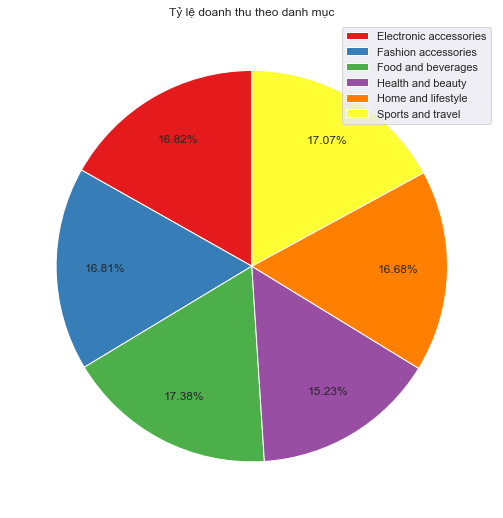

In [10]:
total_by_product_line = data.groupby('Product line')['Total'].sum()
fig, ax = plt.subplots(figsize=(16,9), num=1)
ax.pie(total_by_product_line, 
        startangle=90,
        autopct='%.2f%%', pctdistance=0.75)
ax.set_title(label="Tỷ lệ doanh thu theo danh mục")
ax.legend(loc='best', labels = total_by_product_line.index, fontsize=11)
plt.show()

In [11]:
data.Total.max()

1042.65

### So sánh tổng đơn theo giới tính khách hàng 

[Text(0, 0, '272.58'), Text(0, 0, '244.23')]

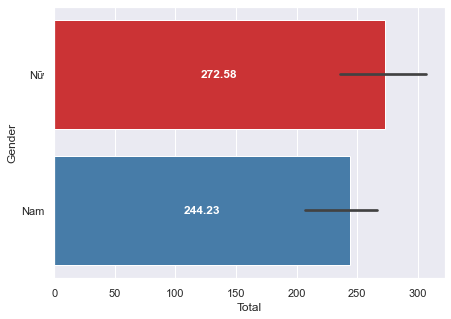

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
sns.barplot(data=data, x='Total', y='Gender', 
            estimator=np.median, ax=ax)
ax.bar_label(container = ax.containers[0], label_type='center', weight='bold', color='white')

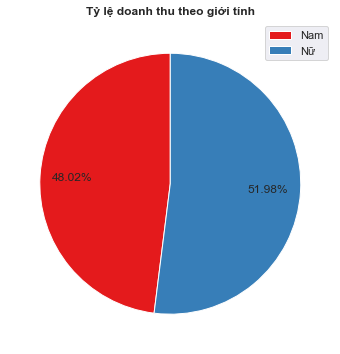

In [13]:
total_by_gender = data.groupby('Gender')['Total'].sum()
total_by_gender
fig, ax = plt.subplots(figsize=(8,6), num=1)
ax.pie(total_by_gender, 
        startangle=90,
        autopct='%.2f%%', pctdistance=0.75)
ax.set_title(label="Tỷ lệ doanh thu theo giới tính", size=12, weight='bold')
ax.legend(loc='best', labels = total_by_gender.index, fontsize=11)
plt.show()

<p>- Nữ chi nhiều hơn nam

### So sánh tổng đơn theo phương thức thanh toán 

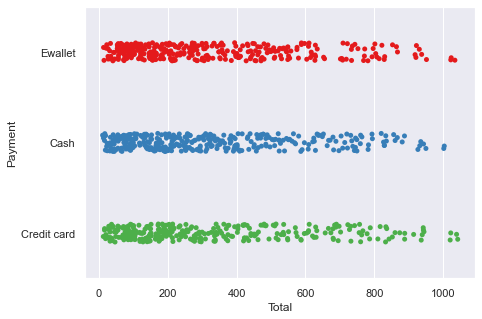

In [14]:
ax = sns.stripplot(data=data, x='Total', y='Payment')

In [1]:
payment_counts = data['Payment'].value_counts().sort_index()
pay_by_gen = data.groupby('Payment')['Gender'].value_counts().sort_index() 

explode = [0.01, 0.01, 0.01]
colors = sns.color_palette('coolwarm', len(payment_counts))
labels = payment_counts.index
fig, ax = plt.subplots(figsize=(10,8), num=1)
pie1 = ax.pie(payment_counts, wedgeprops={'width':0.35},
             startangle=90, radius=0.75,
             autopct='%.2f%%', pctdistance=0.75,
             colors=colors)
#wedges, text_labels, text_pcts = pie1
ax.legend(labels=labels, loc='center', frameon=False, fontsize=11)
arr=[[np.array(list(color))*0.85, np.array(list(color))*0.95] for i,color in enumerate(list(colors))]
colors2 = [a for ar in arr for a in ar]
labels2 = [tup[1] for tup in pay_by_gen.index]
_, _, autopcts = ax.pie(pay_by_gen.values, wedgeprops={'width':0.33},
             startangle=90, radius=0.75+0.35,autopct='%.2f%%',
              pctdistance=0.85, colors=colors2, labels=labels2)

fig.suptitle('Tỷ lệ phương thức thanh toán và tỷ lệ sử dụng theo giới tính', fontsize=12, weight='bold')
plt.show()

NameError: name 'data' is not defined

# Mỗi đơn hàng có một số mặt hàng, vẽ phân bố số lượng đơn theo số mặt hàng (chẳng hạn các đơn hàng có 1,2,3... mặt hàng có số đơn là bao nhiêu?)

In [16]:
data.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating
0,750-67-8428,Hà Nội,Member,Nữ,Health and beauty,74.69,7,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,9.1
1,226-31-3081,TP HCM,Normal,Nữ,Electronic accessories,15.28,5,3.8200,80.2200,3/8/19,10:29,Cash,76.40,9.6
2,631-41-3108,Hà Nội,Normal,Nam,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,7.4
3,123-19-1176,Hà Nội,Member,Nam,Health and beauty,58.22,8,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,8.4
4,373-73-7910,Hà Nội,Normal,Nam,Sports and travel,86.31,7,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,5.3


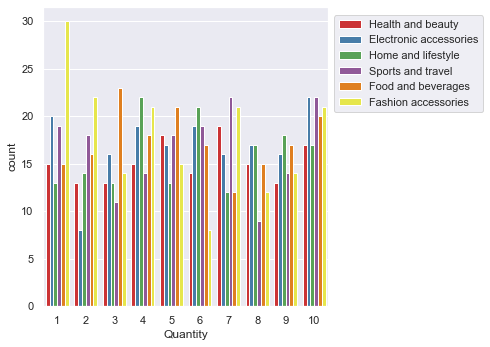

In [17]:
ax = sns.countplot(data=data, x='Quantity', hue='Product line')
plt.legend(loc=[1.02,0.65]) # vị trí của label
plt.tight_layout()
plt.savefig('quantity_productline.png')

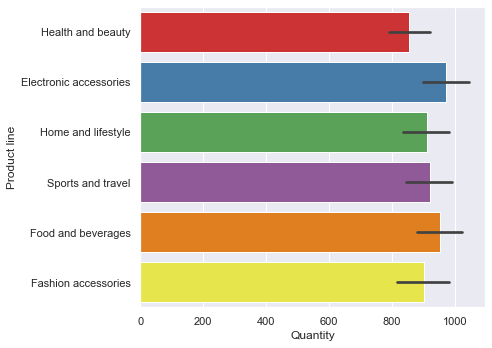

In [18]:
ax = sns.barplot(data=data, x='Quantity', y='Product line', estimator=np.sum)
plt.tight_layout()
plt.savefig('quantity_productline.png')

# Thời gian: ngày nào bận rộn nhất tuần? thời điểm nào bận rộn nhất trong ngày?

## Ngày nào bận rộn nhất tuần

In [19]:
pd.to_datetime(data['Date']).dt.day_name()

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Date, Length: 1000, dtype: object

In [20]:
# dow = ['Monday', 'Tuesday', 'Wednesday', 
#        'Thursday', 'Friday', 'Saturday', 'Sunday']
data['dow'] = pd.to_datetime(data['Date']).dt.day_name()
data.sample(5)

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating,dow
414,472-15-9636,Hà Nội,Normal,Nam,Home and lifestyle,50.93,8,20.3720,427.8120,3/22/19,19:36,Ewallet,407.44,9.2,Friday
391,173-82-9529,Đà Nẵng,Normal,Nữ,Fashion accessories,37.95,10,18.9750,398.4750,1/26/19,14:51,Cash,379.50,9.7,Saturday
853,866-70-2814,TP HCM,Normal,Nữ,Electronic accessories,52.79,10,26.3950,554.2950,2/25/19,11:58,Ewallet,527.90,10.0,Monday
376,843-01-4703,Đà Nẵng,Member,Nữ,Home and lifestyle,35.38,9,15.9210,334.3410,1/5/19,19:50,Credit card,318.42,9.6,Saturday
226,836-82-5858,TP HCM,Member,Nam,Health and beauty,69.37,9,31.2165,655.5465,1/26/19,19:14,Ewallet,624.33,4.0,Saturday


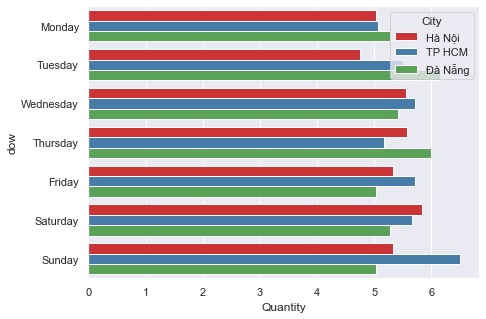

In [21]:
dow = ['Monday','Tuesday','Wednesday','Thursday','Friday',
      'Saturday','Sunday']
ax = sns.barplot(data=data, x='Quantity', y='dow',
                 hue='City', ci=None, order=dow,
                estimator=np.mean)

In [22]:
max_quantity_dow_cn = data[['Quantity','City','dow']]
max_quantity_dow_cn = max_quantity_dow_cn.groupby(['City','dow']).sum()
max_quantity_dow_cn = max_quantity_dow_cn.reset_index()
max_quantity_dow_cn

,City,dow,Quantity
0,Hà Nội,Friday,208
1,Hà Nội,Monday,196
2,Hà Nội,Saturday,216
3,Hà Nội,Sunday,224
4,Hà Nội,Thursday,223
5,Hà Nội,Tuesday,204
6,Hà Nội,Wednesday,189
7,TP HCM,Friday,389
8,TP HCM,Monday,284
9,TP HCM,Saturday,487


In [23]:
max_quantity_dow_cn['dow'] = pd.Categorical(max_quantity_dow_cn['dow'],
                                            categories = ['Monday', 'Tuesday', 'Wednesday', 
                                            'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                            ordered=True)
max_quantity_dow_cn = max_quantity_dow_cn.sort_values('dow',ascending=True)
max_quantity_dow_cn.reset_index(drop=True)

,City,dow,Quantity
0,Hà Nội,Monday,196
1,Đà Nẵng,Monday,158
2,TP HCM,Monday,284
3,Hà Nội,Tuesday,204
4,Đà Nẵng,Tuesday,234
5,TP HCM,Tuesday,424
6,Đà Nẵng,Wednesday,206
7,Hà Nội,Wednesday,189
8,TP HCM,Wednesday,405
9,Đà Nẵng,Thursday,186


In [24]:
max_cn = pd.DataFrame(max_quantity_dow_cn.groupby(['City'])['Quantity'].max())
max_cn.reset_index(drop=True)
max_cn

,Quantity
City,
Hà Nội,224
TP HCM,487
Đà Nẵng,234


In [25]:
max_cn = pd.merge(max_cn,max_quantity_dow_cn, on='Quantity')
max_cn

,Quantity,City,dow
0,224,Hà Nội,Sunday
1,487,TP HCM,Saturday
2,234,Đà Nẵng,Tuesday


# Thời điểm nào bận rộn nhất trong ngày

In [26]:
data.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating,dow
0,750-67-8428,Hà Nội,Member,Nữ,Health and beauty,74.69,7,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,9.1,Saturday
1,226-31-3081,TP HCM,Normal,Nữ,Electronic accessories,15.28,5,3.8200,80.2200,3/8/19,10:29,Cash,76.40,9.6,Friday
2,631-41-3108,Hà Nội,Normal,Nam,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,7.4,Sunday
3,123-19-1176,Hà Nội,Member,Nam,Health and beauty,58.22,8,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,8.4,Sunday
4,373-73-7910,Hà Nội,Normal,Nam,Sports and travel,86.31,7,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,5.3,Friday


In [27]:
Hour = pd.to_datetime(data['Time'])
Hour = pd.DataFrame(data=Hour)
Hour = Hour.Time.dt.hour
Hour

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Time, Length: 1000, dtype: int64

In [28]:
data['Hour'] = Hour
data.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating,dow,Hour
0,750-67-8428,Hà Nội,Member,Nữ,Health and beauty,74.69,7,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,9.1,Saturday,13
1,226-31-3081,TP HCM,Normal,Nữ,Electronic accessories,15.28,5,3.8200,80.2200,3/8/19,10:29,Cash,76.40,9.6,Friday,10
2,631-41-3108,Hà Nội,Normal,Nam,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,7.4,Sunday,13
3,123-19-1176,Hà Nội,Member,Nam,Health and beauty,58.22,8,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,8.4,Sunday,20
4,373-73-7910,Hà Nội,Normal,Nam,Sports and travel,86.31,7,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,5.3,Friday,10


### Ý tưởng:
+ Tạo cột mới time_of_day chỉ có thông tin tên của thời điểm là 'chiều'
+ Nếu data['Hour'<12] thì đổi thời điểm buổi là 'sáng'
+ Nếu data['Hour']>=12 và data['Hour']<18 đổi thời điểm thông tin buổi là 'Chiều'

In [29]:
time_of_day = pd.Series(['Tối'] * data['Hour'].size)
time_of_day[data['Hour'] < 12] = 'Sáng'
time_of_day[(12 <= data['Hour']) & (data['Hour'] <18)] = "Chiều"
data['time_of_day'] = time_of_day
data.pop('Hour')
data.sample(5)

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating,dow,time_of_day
678,648-94-3045,TP HCM,Normal,Nam,Health and beauty,58.95,10,29.4750,618.9750,2/7/19,14:27,Ewallet,589.50,8.1,Thursday,Chiều
265,253-12-6086,Hà Nội,Member,Nữ,Sports and travel,98.40,7,34.4400,723.2400,3/12/19,12:43,Credit card,688.80,8.7,Tuesday,Chiều
659,491-38-3499,Hà Nội,Member,Nam,Fashion accessories,55.45,1,2.7725,58.2225,2/26/19,17:46,Credit card,55.45,4.9,Tuesday,Chiều
955,846-10-0341,Hà Nội,Normal,Nữ,Fashion accessories,42.57,7,14.8995,312.8895,1/6/19,11:51,Cash,297.99,6.8,Sunday,Sáng
44,617-15-4209,TP HCM,Member,Nam,Health and beauty,15.37,2,1.5370,32.2770,3/16/19,19:47,Cash,30.74,7.2,Saturday,Tối


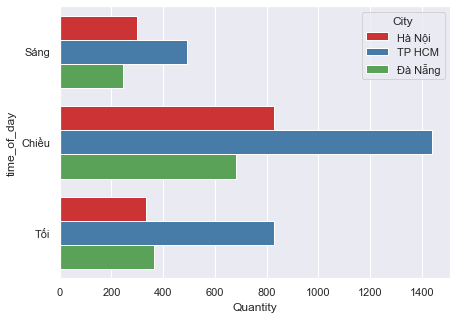

In [30]:
order = ['Sáng','Chiều','Tối']
ax = sns.barplot(data=data, x='Quantity', y='time_of_day',
                 hue='City', ci=None, order=order,
                estimator=np.sum)

# $\color{red}{\text{Đa biến (cần kết hợp 2 hay nhiều cột):}}$

# Doanh thu: tỷ lệ tổng doanh thu theo chi nhánh, nhóm hàng, giới tính khách hàng

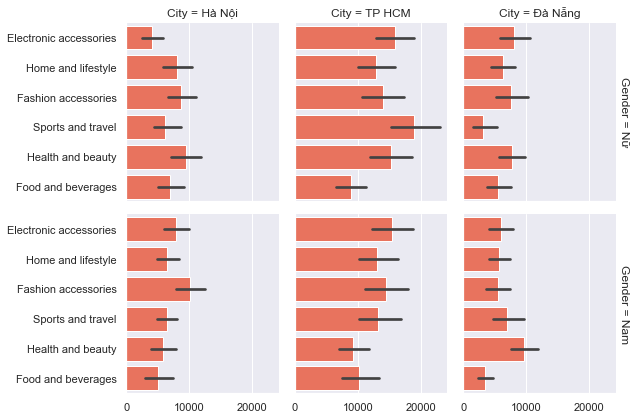

In [31]:
doanh_thu = sns.FacetGrid(data, col='City', row='Gender',margin_titles=True) #Khởi tạo một đối tượng biểu đồ dạng FacetGrid
#Ánh xạ (mapping) các cột dữ liệu vào biểu đồ:
doanh_thu.map_dataframe(sns.barplot, x='Total', y='Product line',estimator=np.sum, color='tomato')

# Tax: tỷ lệ tổng doanh thu theo chi nhánh, nhóm hàng, giới tính khách hàng

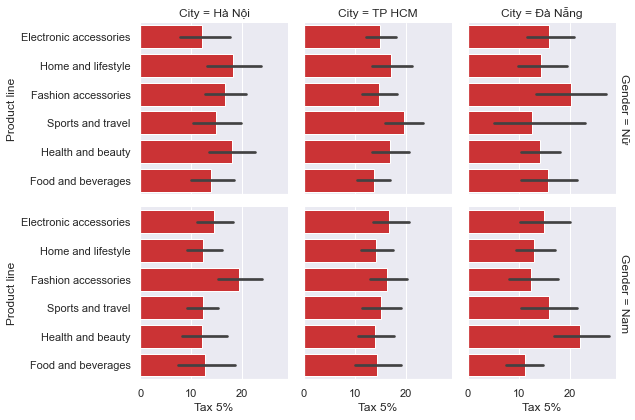

In [41]:

tax = sns.FacetGrid(data, col='City', row='Gender',margin_titles=True)
tax.map_dataframe(sns.barplot, 'Tax 5%','Product line', estimator=np.mean)


#  Rating: so sánh rating giữa các nhóm hàng, giữa các ngày trong tuần, giới tính

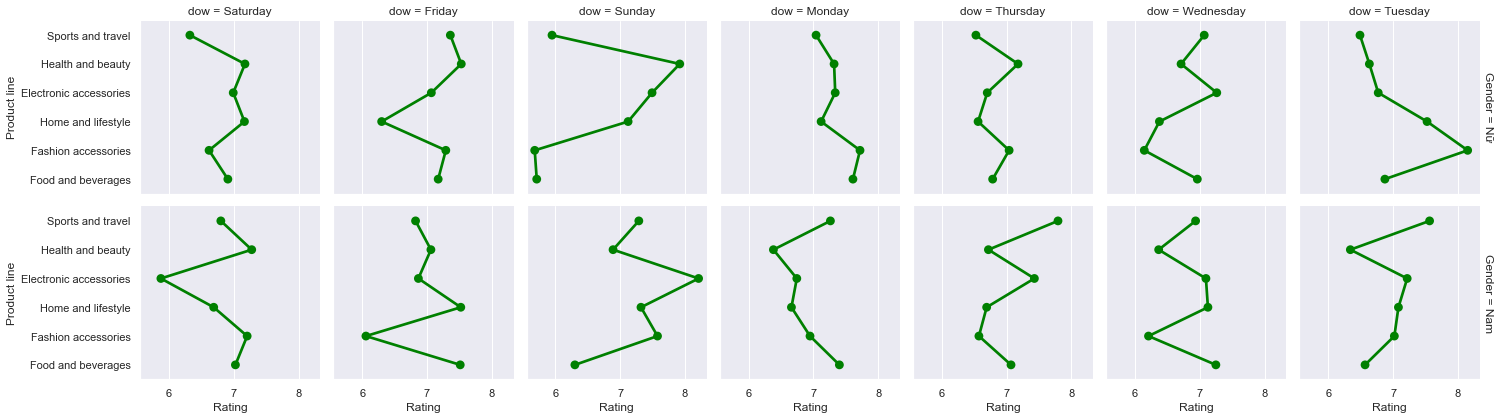

In [38]:
rating = sns.FacetGrid(data, col='dow', row='Gender',margin_titles=True)
rating.map_dataframe(sns.pointplot, 'Rating', 'Product line', color='green', 
                     ci=None, estimator=np.mean)

plt.tight_layout()
plt.show()

# Xem xét mối tương quan giữa các biến dạng số

In [34]:
data.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating,dow,time_of_day
0,750-67-8428,Hà Nội,Member,Nữ,Health and beauty,74.69,7,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,9.1,Saturday,Chiều
1,226-31-3081,TP HCM,Normal,Nữ,Electronic accessories,15.28,5,3.8200,80.2200,3/8/19,10:29,Cash,76.40,9.6,Friday,Sáng
2,631-41-3108,Hà Nội,Normal,Nam,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,7.4,Sunday,Chiều
3,123-19-1176,Hà Nội,Member,Nam,Health and beauty,58.22,8,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,8.4,Sunday,Tối
4,373-73-7910,Hà Nội,Normal,Nam,Sports and travel,86.31,7,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,5.3,Friday,Sáng


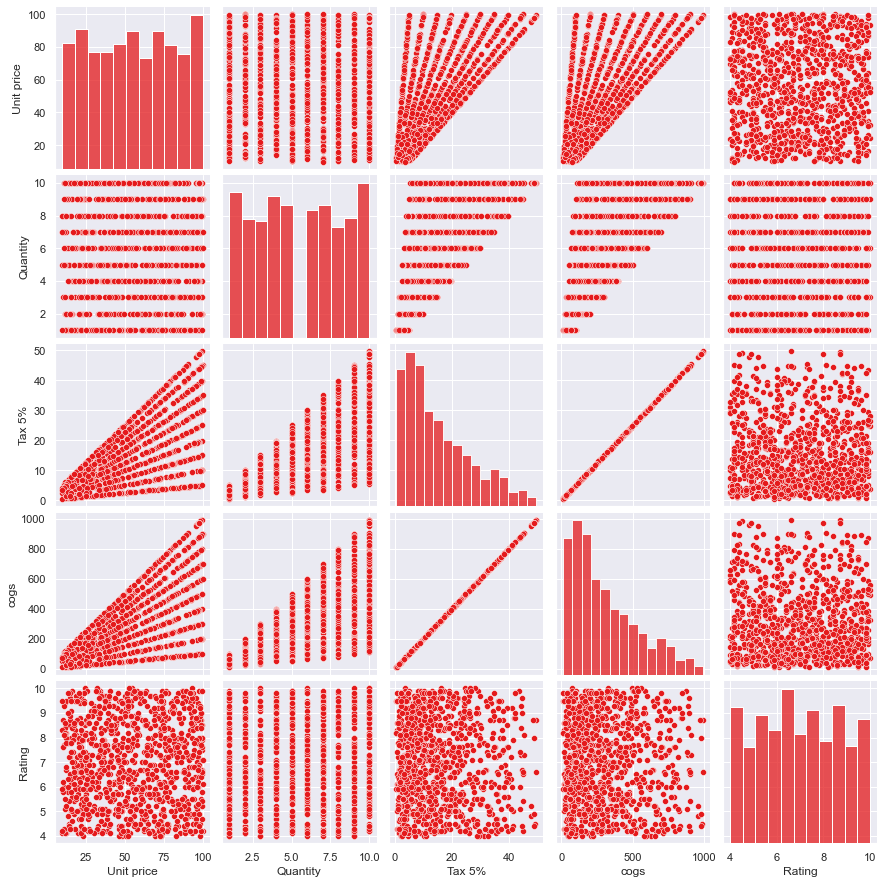

In [35]:
sns.pairplot(data, vars=['Unit price','Quantity','Tax 5%','cogs','Rating'])

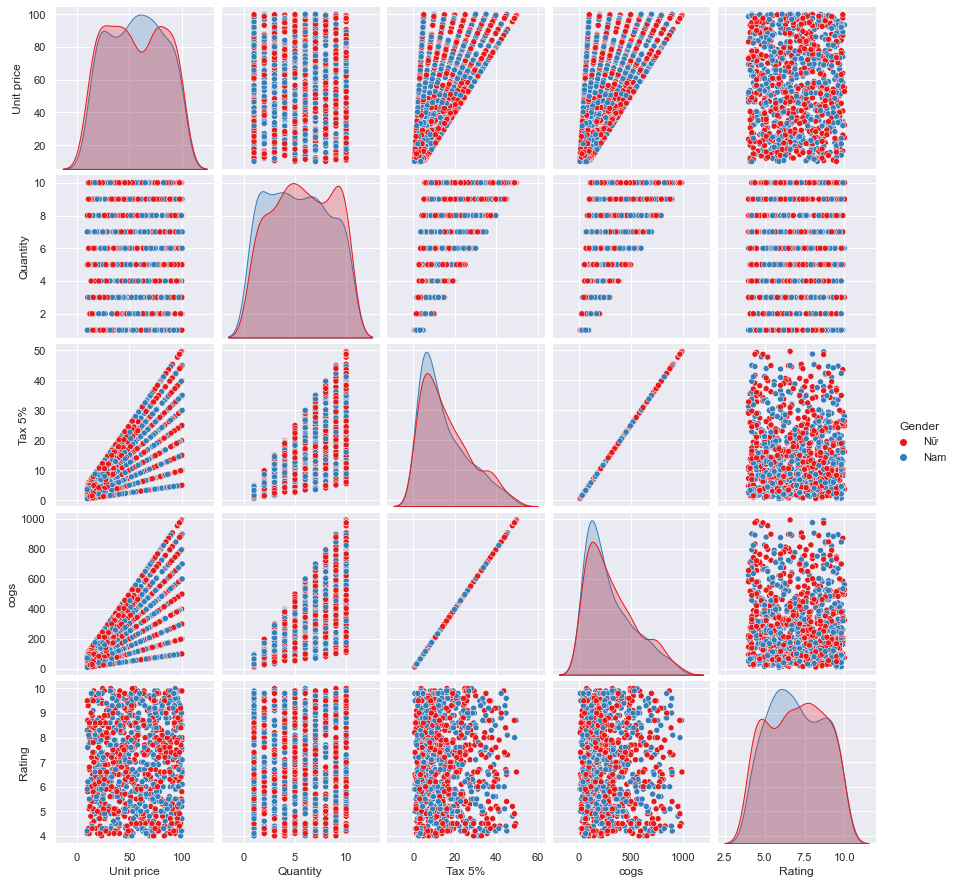

In [36]:
sns.pairplot(data, vars=['Unit price','Quantity','Tax 5%','cogs','Rating'], hue='Gender')